<a href="https://colab.research.google.com/github/drcrajc/nanoelectronics/blob/main/exp_finfet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

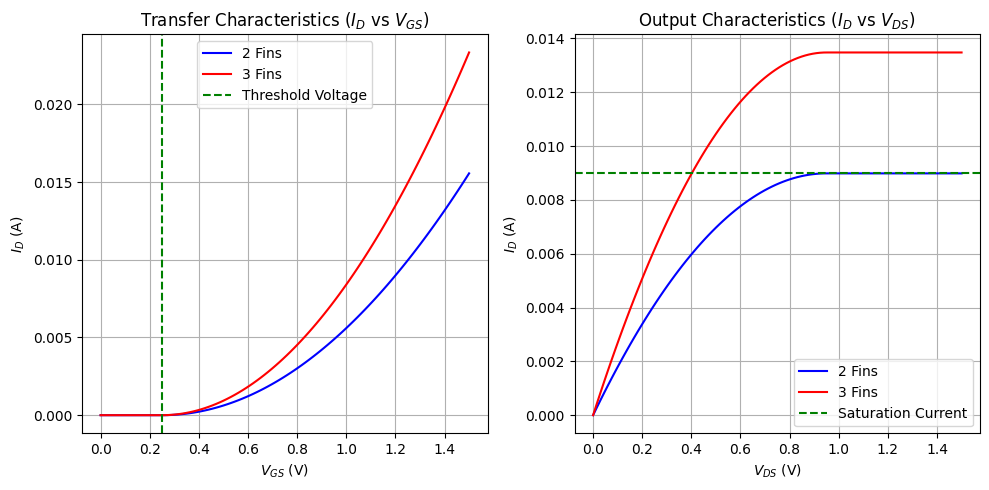

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon_0 = 8.85e-12  # Permittivity of free space (F/m)
kappa = 25  # Relative permittivity for high-k material (HfO2)
tox = 2e-9  # Oxide thickness (m)
mu_n = 500e-4  # Electron mobility (m^2/Vs)
L = 50e-9  # Channel length (m)
H_fin = 40e-9  # Fin height (m)
W_fin = 10e-9  # Fin width (m)
Vth = 0.25  # Threshold voltage (V)

# Voltage ranges
Vgs = np.linspace(0, 1.5, 100)  # Gate-to-source voltage (V)
Vds = np.linspace(0, 1.5, 100)  # Drain-to-source voltage (V)

# Calculate Cox for high-k material
Cox = (epsilon_0 * kappa) / tox

# Function to calculate effective width of FinFET based on number of fins
def effective_width(n_fins, H_fin, W_fin):
    return n_fins * (2 * H_fin + W_fin)

# Function to calculate Id vs Vgs (transfer characteristic) for FinFET
def Id_vs_Vgs(Vgs, Vds, Vth, mu_n, Cox, W_eff, L):
    Id = np.zeros_like(Vgs)
    for i, Vg in enumerate(Vgs):
        if Vg > Vth:
            Id[i] = 0.5 * mu_n * Cox * (W_eff / L) * (Vg - Vth)**2  # Saturation region
        else:
            Id[i] = 0  # Below threshold, current is negligible
    return Id

# Function to calculate Id vs Vds (output characteristic) for FinFET
def Id_vs_Vds(Vgs, Vds, Vth, mu_n, Cox, W_eff, L):
    Id = np.zeros_like(Vds)
    for i, Vd in enumerate(Vds):
        if Vgs > Vth:
            if Vd < (Vgs - Vth):  # Triode region
                Id[i] = mu_n * Cox * (W_eff / L) * ((Vgs - Vth) * Vd - 0.5 * Vd**2)
            else:  # Saturation region
                Id[i] = 0.5 * mu_n * Cox * (W_eff / L) * (Vgs - Vth)**2
        else:
            Id[i] = 0  # Below threshold
    return Id

# Effective width for 2 fins and 3 fins
W_eff_2fins = effective_width(2, H_fin, W_fin)
W_eff_3fins = effective_width(3, H_fin, W_fin)

# Calculate Id for different Vgs and Vds for 2 fins and 3 fins
Id_vgs_2fins = Id_vs_Vgs(Vgs, 1.0, Vth, mu_n, Cox, W_eff_2fins, L)  # For Vds = 1V
Id_vgs_3fins = Id_vs_Vgs(Vgs, 1.0, Vth, mu_n, Cox, W_eff_3fins, L)  # For Vds = 1V

Id_vds_2fins = Id_vs_Vds(1.2, Vds, Vth, mu_n, Cox, W_eff_2fins, L)  # For Vgs = 1.2V
Id_vds_3fins = Id_vs_Vds(1.2, Vds, Vth, mu_n, Cox, W_eff_3fins, L)  # For Vgs = 1.2V

# Plot Id vs Vgs (Transfer characteristic) comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(Vgs, Id_vgs_2fins, label='2 Fins', color='b')
plt.plot(Vgs, Id_vgs_3fins, label='3 Fins', color='r')
plt.axvline(x=Vth, color='g', linestyle='--', label='Threshold Voltage')
plt.title('Transfer Characteristics ($I_D$ vs $V_{GS}$)')
plt.xlabel('$V_{GS}$ (V)')
plt.ylabel('$I_D$ (A)')
plt.legend()
plt.grid(True)

# Plot Id vs Vds (Output characteristic) comparison
plt.subplot(1, 2, 2)
plt.plot(Vds, Id_vds_2fins, label='2 Fins', color='b')
plt.plot(Vds, Id_vds_3fins, label='3 Fins', color='r')
plt.axhline(y=max(Id_vds_2fins), color='g', linestyle='--', label='Saturation Current')
plt.title('Output Characteristics ($I_D$ vs $V_{DS}$)')
plt.xlabel('$V_{DS}$ (V)')
plt.ylabel('$I_D$ (A)')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
